# nmi | spring 2024
## lecture 16 : implicit, stiff


### 6.6 implicit methods and stiff equations



the previous ODE solvers have been explicit -- ie, $w_{i+1}$ has an explicit formula in terms of known data $h,t_i,w_i$. also, complex step-size algorithms may waste cpu.
</br>


##### example 24


example 24 revisits example 23 with eulers.
</br></br>

\begin{align}
  \textrm{example 24} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = 10(1-y) \\
      y(0) = \frac{1}{2} \\
      t \in [0,100]
    \end{array}
  \right.
\end{align}
</br>

exact solution: $y(t) = 1-\frac{e^{-10t}}{2}$.
</br></br>

\begin{align}
  w_{i+1} &= w_i + hf(t_i,w_i) \\
  &= w_i + h(10)(1-w_i) \\
  &= w_i(1-10h) + 10h = g(x).
\end{align}
</br>

ie, $w_{i+1} \rightarrow 1$ and from fpi $g(x) = w_i(1-10h) + 10h$ if $|g'(x)| = |1-10h| < 1$ which happens if $0 < h < 0.2$
</br>


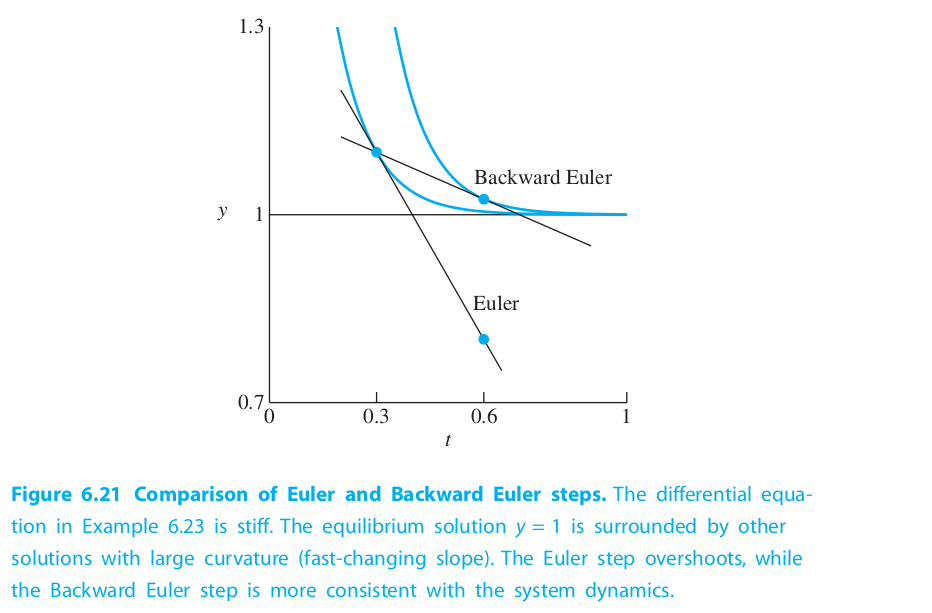

sauer uses important terminology here: there is "an attracting equilibrium" at $y = 1$ and an euler step-size of $h=0.3$ does not find it bc the change in slope of the solution $y(t)$ is too great. DEs like this, where the attracting solutions are surrounding with fast-changing nearby solutions, are called <b>stiff</b>.
</br></br>

one way to solve this is to bring in information from the right side of the interval $[t_i,t_i + h]$ instead of relying only from the left side.
</br>


##### <b>backward euler</b>


\begin{align}
  w_0 &= y_0 \\
  w_{i+1} &= w_i + hf(t_{i+1},w_{i+1}).
\end{align}
</br>


##### example 24, continued


\begin{align}
  w_{i+1} &= w_i + 10h(1-w_{i+1}) \\
  \\
  &\quad\Downarrow \\
  \\
  w_{i+1} &= \frac{w_i + 10h}{1 + 10h}.
\end{align}
</br>

$h = 0.3$ gives $w_{i+1} = \frac{w_i + 3}{4}$. ie, $w \rightarrow g(w) = \frac{w + 3}{4}$. also, $g'(1) = \frac{1}{4} < 1$, so backwards euler converges here. for any $h$.
</br></br>

(earlier chapters have already said about $x_{n+1} = g(x_n)$.)
</br>


##### example 25


apply backwards euler to IVP
</br></br>

\begin{align}
  \textrm{example 25} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = y + 8y^2 - 9y^3 \\
      y(0) = \frac{1}{2} \\
      t \in [0,3]
    \end{array}
  \right.
\end{align}
</br>

equilibrium solution $y=1$ and $\frac{\partial f}{\partial y} = 1 + 16y - 27y^2$ evaluates to $-10$ at $y=1$, identifying this equation as moderately stiff. eulers forward will need an upper bound for $h$, so try eulers backward.
</br></br>

\begin{align}
  w_{i+1} &= w_i + hf(t_{i+1},w_{i+1}) \\
  &= w_i + h(w_{i+1} + 8w_{i+1}^2 - 9w_{i+1}^3) \\
  \\
  &\quad\Downarrow z = w_{i+1} \\
  \\
  z &= w_i + h(z+8z^2-9z^3) \\
  &\Rightarrow 9hz^3 - 8hz^2 + (1-h)z - w_i = 0 \\
  \\
  z_{new} &= z - \frac{9hz^3 - 8hz^2 + (1-h)z - w_i}{27hz^2 - 16hz + 1 -h}.
\end{align}
</br>


###### code


In [ ]:
# eg 25 : solvers, stuff

euler_step = lambda t,y,h,ydot: y + h*ydot(t,y)

def fpi_nm(y1,h,g,tol):
  y2_prev = y1
  y2_next = g([y1,y2_prev],h)
  while abs(y2_next-y2_prev) > tol:
    y2_prev = y2_next
    y2_next = g([y1,y2_prev],h)
  rc = y2_prev
  return rc

# implicit g specific to eg 25
def euler_implicit(y,h):
  w,z = y[0],y[1]
  zn = 9*h*pow(z,3) - 8*h*pow(z,2) + (1-h)*z - w
  zd = 27*h*pow(z,2) - 16*h*z + (1-h)
  rc = z - zn/zd
  return rc


In [ ]:
# eg 25 : ivp, solution

# ivp: f(t,y)
ydot = lambda t,y: y + 8*pow(y,2) - 9*pow(y,3)

# ivp: ic,t
ic = 0.5
t = [0.,3.]

# solution, for error
y = lambda t: 1. # no idea
y2 = y(t[1]) # true value at interval end point


$y(t):\quad \frac{(9y+1)^{81}(y-1)}{y^{10}} = ce^{-10t}$



euler, explicit vs implicit, step-size 0.3



,t,y,w,z,k
0,0.0,0.5,0.50000,0.50000,0.50000
1,0.3,1.0,0.91250,0.84216,0.84990
2,0.6,1.0,1.13317,0.95809,1.01081
3,0.9,1.0,0.62620,0.98936,1.00362
4,1.2,1.0,1.09219,0.99742,1.00100
...,...,...,...,...,...
6,1.8,1.0,1.19028,0.99984,1.00006
7,2.1,1.0,0.39448,0.99996,1.00002
8,2.4,1.0,0.72056,0.99996,1.00000
9,2.7,1.0,1.17270,0.99996,1.00000


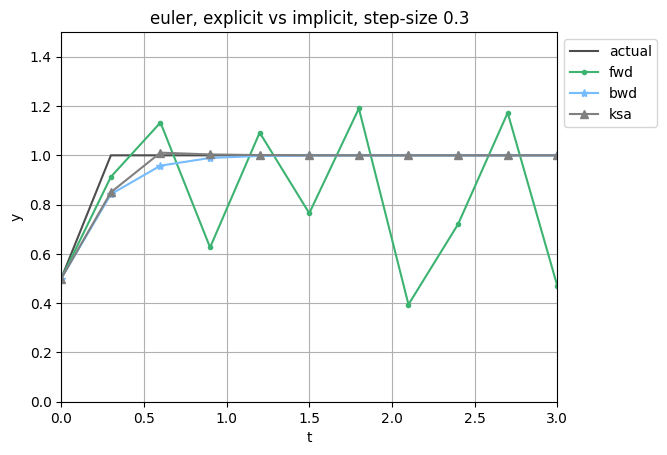

In [ ]:
# eg 25 : compare euler explicit, implicit

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# n partitions of step-size h
h = 0.3
n = round((t[1]-t[0])/h)

# tolerance
tol = 1e-4

# ic
t1 = t2 = t[0]
w1 = z1 = k1 = ic

# ic, dataframe
ds = np.zeros((n+1,5)) # t,y,fwd,bwd,k
ds[0,:] = [t1,ic,w1,z1,k1]

# calc
for i in range(n):
  t2 += h
  w2 = euler_step(t1,w1,h,ydot)
  k2 = euler_step(t1,k1,h,ydot)
  k2 = euler_implicit([k1,k2],h)
  z2 = fpi_nm(z1,h,euler_implicit,tol)

  t1,w1,z1,k1 = t2,w2,z2,k2
  ds[i+1,:] = [t1,y(t1),w1,z1,k1]

# dataframe from datastore
s_title = "euler, explicit vs implicit, step-size " + str(h)
print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
pd.set_option("display.max_rows",10)
pd.set_option("display.precision",5)
df = pd.DataFrame(data=ds,columns=["t","y","w","z","k"])
if True: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x="t",y="y",label="actual",color="0.3")
  ax11 = df.plot(x="t",y="w",label="fwd",ax=ax1,color="mediumseagreen",marker=".")
  ax12 = df.plot(x="t",y="z",label="bwd",ax=ax1,color="xkcd:sky blue",marker="*")
  ax13 = df.plot(x="t",y="k",label="ksa",ax=ax1,color="0.5",marker="^")
  ax1.set_title(s_title)
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  ax1.axis((0,3,0,1.5))
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')
  plt.legend(bbox_to_anchor=(1,1))
  plt.show()
